# Tâche n°7: Bandes électroniques 

In [1]:
from pymatgen.ext.matproj import MPRester
import matplotlib.pyplot as plt
import numpy as np
from pymatgen.electronic_structure.plotter import BSPlotter


with MPRester("yDHrTj9RRkoKjTjOFwD0btKpsIOcE65N") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-20072")

    # Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-20072")

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

1. Déterminer la bande interdite 

La bande interdite de notre structure est indirecte, ce qui signifie que l’énergie maximale de la bande de valence ne possède pas le même vecteur d’onde que l’énergie minimale de la première bande de conduction. Cela est confirmé par la transition Z-L, où Z correspond au sommet de la bande de valence et L au minimum de la bande de conduction, indiquant que ces deux points sont situés à des positions différentes dans l’espace réciproque.
L’énergie de la bande interdite est de 2,5216 eV, ce qui correspond à l’écart entre le sommet de la bande de valence et le minimum de la bande de conduction.

{'direct': False, 'energy': 2.5215999999999994, 'transition': 'Z-L'}


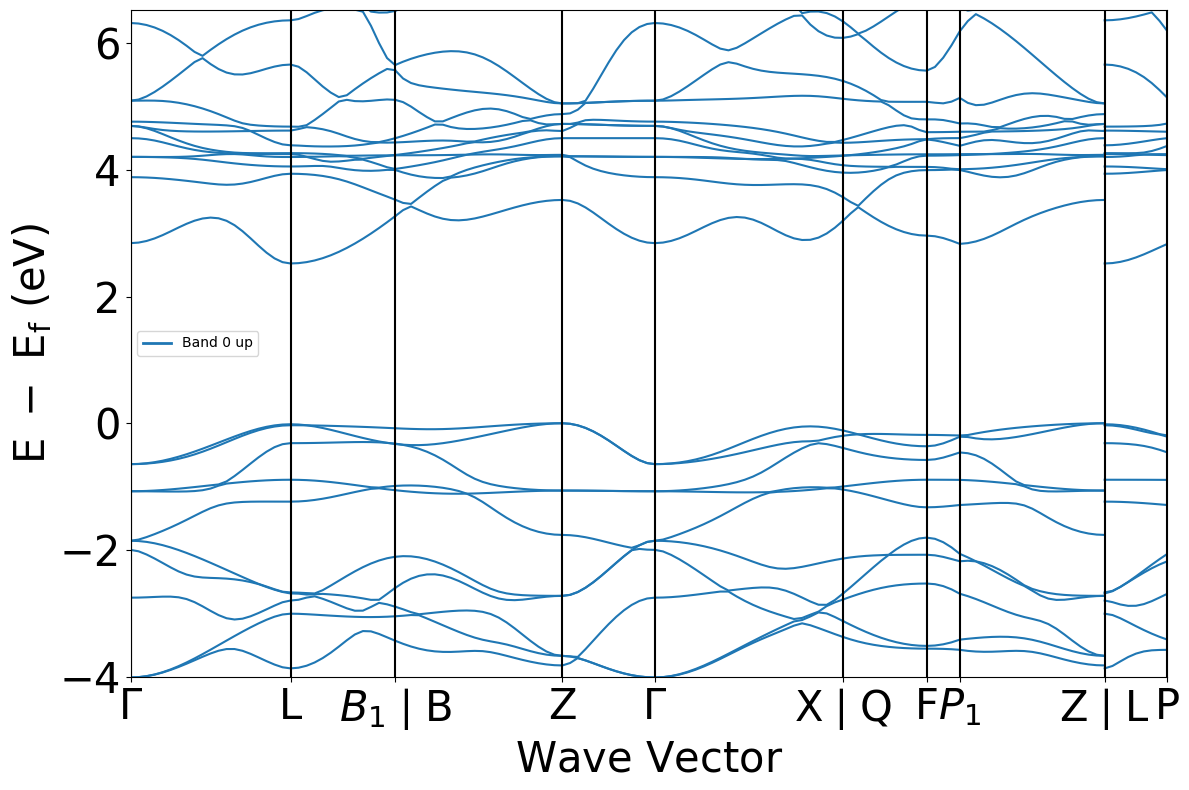

In [2]:
bandgap = bandstructure.get_band_gap()
print(bandgap)
plotter = BSPlotter(bandstructure)
plot = plotter.get_plot()

2. Direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion

a. Les indices des bandes nous indiquent que la dernière bande de valence correspond à l’indice 19, et que la première bande de conduction correspond à l’indice 20. La bande interdite se situe entre ces deux niveaux. On observe que les bandes de valence incluent les indices 18 et 19, ce qui confirme que la bande 19 est bien la plus haute avant la transition vers la bande de conduction

In [3]:
valence = bandstructure.get_vbm()
conduction = bandstructure.get_cbm()

valence_index = valence['band_index']  
conduction_index = conduction['band_index']

print("Indices des bandes de valence :", valence_index)
print("Indices des bandes de conduction :", conduction_index)

Indices des bandes de valence : defaultdict(<class 'list'>, {<Spin.up: 1>: [18, 19]})
Indices des bandes de conduction : defaultdict(<class 'list'>, {<Spin.up: 1>: [20]})


b. On a d'abord calculer la Dispersion dans le Diagramme de Bandes. La dispersion est calculée en déterminant la variation d’énergie entre deux points successifs dans l’espace des vecteurs d’onde \( x \). Elle est définie comme :

$$
\text{Dispersion} = \frac{E(x_2) - E(x_1)}{x_2 - x_1}
$$

Dans le code, nous avons extrait ces valeurs pour chaque intervalle de \( x \) et affiché les résultats sous forme de tableau.

c. L’analyse des dispersions montre que :

- La dispersion minimale dans la bande de valence se trouve à l’indice 6, avec une valeur de -0.0459 eV/Å.
- La dispersion maximale dans la bande de valence est à l’indice 3, avec -1.1652 eV/Å.
- Dans la bande de conduction, la dispersion minimale est à l’indice 2 (0.2567 eV/Å).
- La dispersion maximale dans la bande de conduction est à l’indice 3 (-1.2306 eV/Å).

d. Ces valeurs ont été mises en évidence graphiquement à l’aide de flèches de couleurs :

- Rouge → Dispersion minimale en valence.
- Bleu → Dispersion maximale en valence.
- Vert → Dispersion minimale en conduction.
- Jaune → Dispersion maximale en conduction.

---- DISPERSIONS PAR INTERVALLE ----
Index | Dispersion Valence (eV/Å) | Dispersion Conduction (eV/Å)
---------------------------------------------------------------
    0 |                     0.6570 |                     -0.3348
    1 |                    -0.1010 |                      1.1893
    2 |                     0.0788 |                      0.2567
    3 |                    -1.1652 |                     -1.2306
    4 |                     0.4710 |                      0.3142
    5 |                    -0.1387 |                     -0.4700
    6 |                    -0.0459 |                     -0.6585
    7 |                     0.2222 |                      0.7990
    8 |                    -0.4707 |                      0.8213
L’indice avec la dispersion **minimale** dans la dernière bande de valence est 6 → valeur : -0.0459 eV/Å
L’indice avec la dispersion **maximale** dans la dernière bande de valence est 3 → valeur : -1.1652 eV/Å
L’indice avec la dispersion **minimale*

<function matplotlib.pyplot.show(close=None, block=None)>

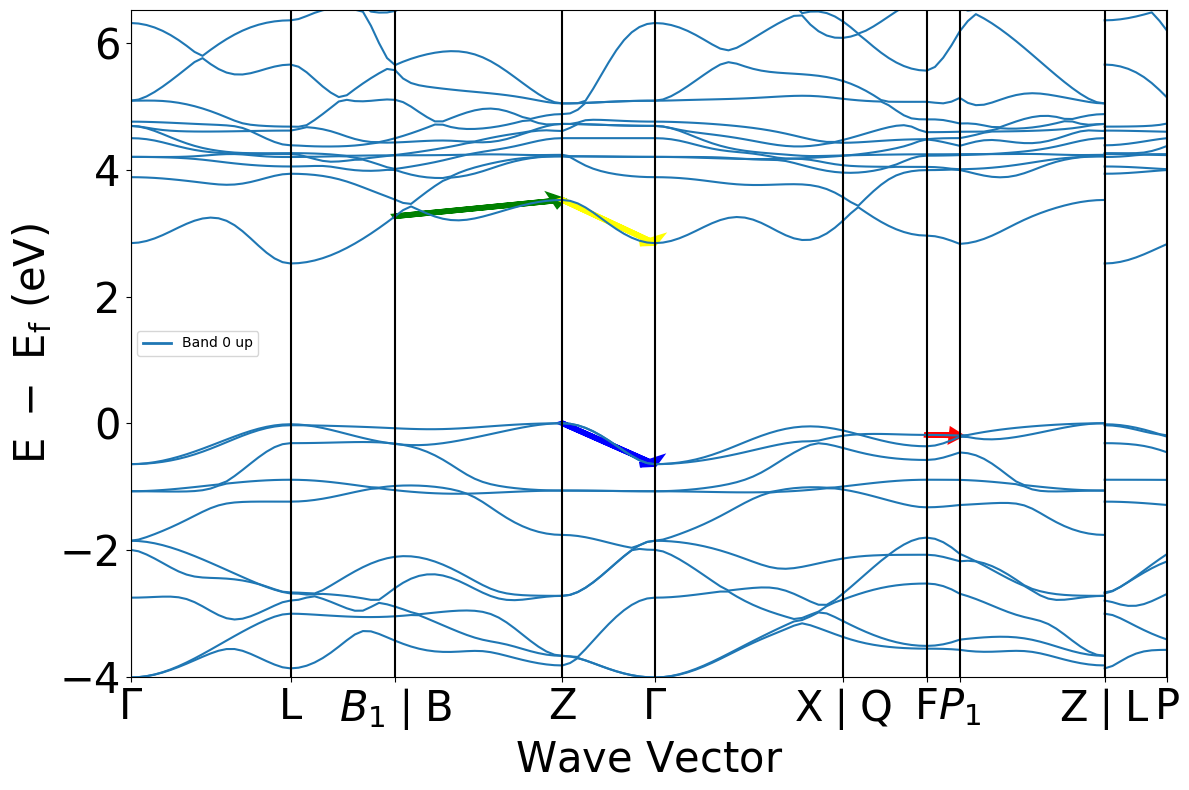

In [4]:
plotter = BSPlotter(bandstructure)
plot = plotter.get_plot()

data = plotter.bs_plot_data()
energies = data.get('energy').get('1')

# Suppression des doublons dans les abscisses k
absc_dupl = data.get('ticks').get('distance')
absc = list(dict.fromkeys(absc_dupl)) 
absc = np.array(absc)

deltaX = absc[1:] - absc[0:-1]  # Distance entre k-points

# Calcul des pentes (dispersion) pour valence et conduction
slopeVal = np.zeros_like(deltaX)
slopeCond = np.zeros_like(deltaX)


for i in range(len(deltaX)):
    slopeVal[i] = (energies[i][19][-1] - energies[i][19][0]) / deltaX[i]
    slopeCond[i] = (energies[i][20][-1] - energies[i][20][0]) / deltaX[i]

print("---- DISPERSIONS PAR INTERVALLE ----")
print("Index | Dispersion Valence (eV/Å) | Dispersion Conduction (eV/Å)")
print("---------------------------------------------------------------")
for i in range(len(deltaX)):
    print(f"{i:>5} | {slopeVal[i]:>26.4f} | {slopeCond[i]:>27.4f}")

# Détection des valeurs minimales et maximales
minVal, maxVal = np.min(np.abs(slopeVal)), np.max(np.abs(slopeVal))
minCond, maxCond = np.min(np.abs(slopeCond)), np.max(np.abs(slopeCond))


minIndexVal = np.argmin(np.abs(slopeVal))
maxIndexVal = np.argmax(np.abs(slopeVal))
minIndexCond = np.argmin(np.abs(slopeCond))
maxIndexCond = np.argmax(np.abs(slopeCond))



print(f"L’indice avec la dispersion **minimale** dans la dernière bande de valence est {minIndexVal} → valeur : {slopeVal[minIndexVal]:.4f} eV/Å")
print(f"L’indice avec la dispersion **maximale** dans la dernière bande de valence est {maxIndexVal} → valeur : {slopeVal[maxIndexVal]:.4f} eV/Å")

print(f"L’indice avec la dispersion **minimale** dans la première bande de conduction est {minIndexCond} → valeur : {slopeCond[minIndexCond]:.4f} eV/Å")
print(f"L’indice avec la dispersion **maximale** dans la première bande de conduction est {maxIndexCond} → valeur : {slopeCond[maxIndexCond]:.4f} eV/Å")

# Rajout des flèches montrant la dispersion 
plt.arrow(absc[minIndexVal], energies[minIndexVal][19][0], 
          absc[minIndexVal + 1] - absc[minIndexVal], 
          energies[minIndexVal][19][-1] - energies[minIndexVal][19][0], 
          head_width=0.15, head_length=0.05, linewidth=4, color='r', length_includes_head=True)

plt.arrow(absc[maxIndexVal], energies[maxIndexVal][19][0], 
          absc[maxIndexVal + 1] - absc[maxIndexVal], 
          energies[maxIndexVal][19][-1] - energies[maxIndexVal][19][0], 
          head_width=0.15, head_length=0.05, linewidth=4, color='b', length_includes_head=True)

plt.arrow(absc[minIndexCond], energies[minIndexCond][20][0], 
          absc[minIndexCond + 1] - absc[minIndexCond], 
          energies[minIndexCond][20][-1] - energies[minIndexCond][20][0], 
          head_width=0.15, head_length=0.05, linewidth=4, color='g', length_includes_head=True)

plt.arrow(absc[maxIndexCond], energies[maxIndexCond][20][0], 
          absc[maxIndexCond + 1] - absc[maxIndexCond], 
          energies[maxIndexCond][20][-1] - energies[maxIndexCond][20][0], 
          head_width=0.15, head_length=0.05, linewidth=4, color='yellow', length_includes_head=True)


plt.show

3. calcul de la masse effective 

Pour calculer la masse effective on utilise cette formule: 
$$
m^* = \left( \frac{\partial^2 E}{\partial x^2} \right)^{-1}
$$

Comme nous travaillons en électronvolts (eV) et non en unités atomiques, nous devons ajuster la formule en intégrant la constante de Planck réduite 
ℏ
ℏ, ce qui donne la relation classique de la masse effective
$$
m^* = \hbar^2 \left( \frac{\partial^2 E}{\partial x^2} \right)^{-1}
$$

Nous supposons une dispersion parabolique, ce qui permet d’exprimer l’énergie sous la forme :

$$
E(x) = \alpha (x - x_{\text{ext}})^2
$$

où :

- \( x_{\text{ext}} \) est le point extrémal (maximum pour la bande de valence, minimum pour la bande de conduction),
- \( \alpha \) est un coefficient déterminé à partir de l’interpolation.

a. Bande de valence
Dans cette bande, nous avons ajusté la relation de dispersion sous la forme :

$$
E(x) = \alpha (x - x_{\text{max}})^2
$$

avec :

$$
\alpha = \frac{\epsilon_2}{(x_2 - x_{\text{max}})^2}
$$

Nous obtenons ainsi une masse effective pour la bande de valence de :

$$
m^* = -8.905585309312397 \times 10^{-31} \text{ kg}
$$

---

b. Bande de conduction
Le même raisonnement est appliqué au minimum de la bande de conduction, en utilisant la relation :

$$
E(x) = \alpha (x - x_{\text{min}})^2 + \epsilon_{\text{min}}
$$

avec :

$$
\alpha = \frac{\epsilon_2 - \epsilon_{\text{min}}}{(x_2 - x_{\text{min}})^2}
$$

Nous obtenons une masse effective pour la bande de conduction de :

$$
m^* = 1.521247116059308 \times 10^{-30} \text{ kg}
$$

Sur la graphe on a représenté
- Une parabole rose pour la bande de valence.
- Une parabole mauve pour la bande de conduction.

Masse effective au sommet de la bande de valence : -8.905585309312397e-31 kg.

Masse effective au minimum de la bande de conduction : 1.521247116059308e-30 kg.



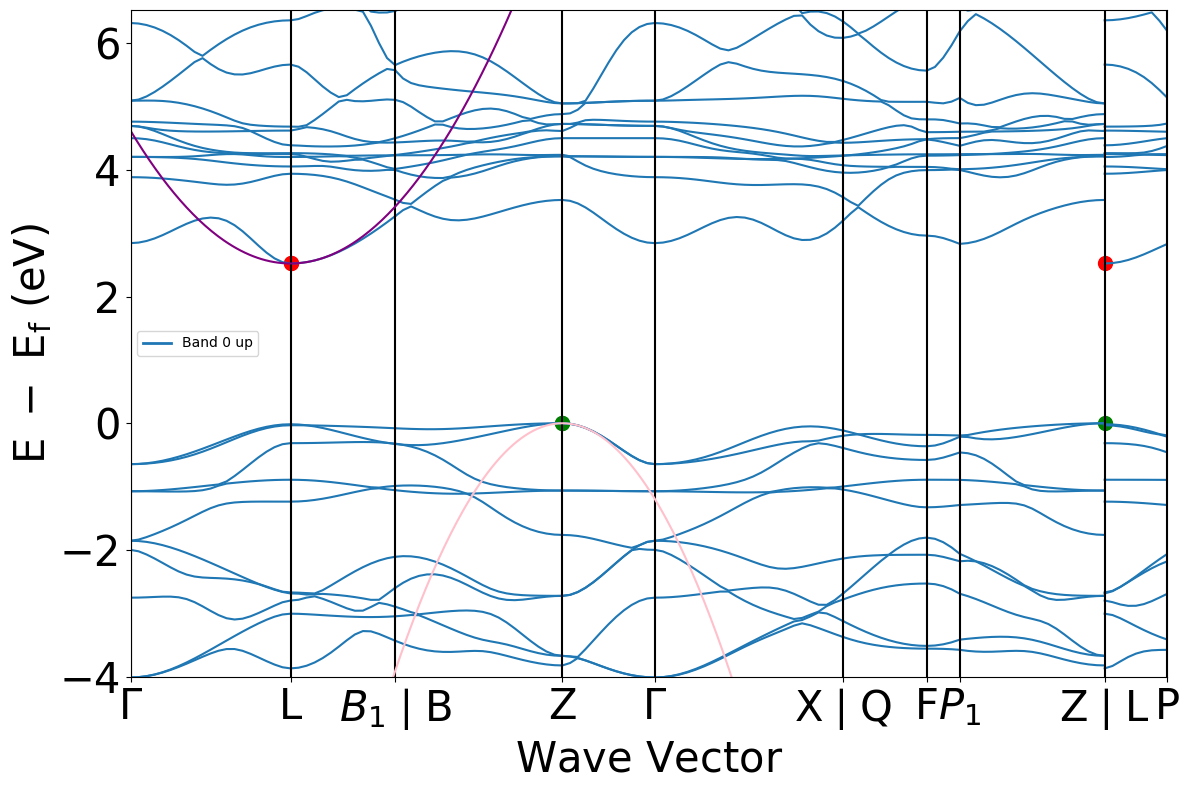

In [5]:
hbar = 6.62607015e-34/(2*np.pi)
eV = 1.602176634e-19
A = 1e-10

d = data.get('distances')

interpdom = np.linspace(d[0][0], d[8][-1], 500)

# Interpolation et calcul de la masse effective pour la bande de valence
xVal = [2*absc[3]-d[3][1], absc[3], d[3][1]]
yVal = [energies[3][19][1], energies[3][19][0], energies[3][19][1]]

# Permet l'affichage de la parabole interpolée 
interpVal = np.polyfit(xVal, yVal, 2) 

alphaVal = (energies[3][19][1])*eV*A**2/((d[3][1]-absc[3])**2) 
massVal = (hbar**2) * 0.5 * (1/alphaVal)
print("Masse effective au sommet de la bande de valence :", massVal, "kg.\n")

# Interpolation et calcul de la masse effective pour la bande de conduction
xCond = [2*absc[1]-d[1][1], absc[1], d[1][1]]
yCond = [energies[1][20][1], energies[1][20][0], energies[1][20][1]]

# Permet l'affichage de la parabole interpolée 
interpCond = np.polyfit(xCond, yCond, 2) 

alphaCond = (energies[1][20][1]-energies[1][20][0])*eV*A**2/((d[1][1]-absc[1])**2)
massCond = (hbar**2) * 0.5 * (1/alphaCond)
print("Masse effective au minimum de la bande de conduction :", massCond, "kg.\n")


plotter.get_plot(vbm_cbm_marker=True)
plt.plot(interpdom, np.polyval(interpVal, interpdom), 'pink')
plt.plot(interpdom, np.polyval(interpCond, interpdom), 'purple')

